In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Rozwiązywanie równań różniczkowych zwyczajnych

## Bartosz Kucharz

# Funkcja do analizy

$y' - kmy\sin(mx) = k^2m\sin(mx)\cos(mx)$

$k=4$

$m=2$

In [6]:
k = 4
m = 2
x0 = -np.pi/4
xk = 2*np.pi

In [7]:
def f(x, y):
    return k**2*m*np.sin(m*x)*np.cos(m*x) + k*m*y*np.sin(m*x)

In [8]:
def exact_f(x):
    return np.exp(-k*np.cos(m*x)) - k*np.cos(m*x) + 1

In [9]:
def euler(x0, a, xk, f, n):
    h = (xk-x0)/(n-1)
    x = np.linspace(x0, xk, n)
    y = np.empty(x.shape)
    y[0] = a
    
    for i in range(1, n):
        y[i] = y[i-1] + f(x[i-1], y[i-1]) * h

    return x, y
    

In [12]:
def draw_euler(n):
    X = np.linspace(x0, xk, 10000)
    Y = np.vectorize(exact_f)(X)

    nx, ny = euler(x0, exact_f(x0), xk, f, n)
    plt.title(f'Wykres metody Eulera dla {n} kroków')
    plt.plot(nx, ny, label='F. wyliczona', lw=4)
    plt.plot(X, Y, label='F. dokładna')
    plt.legend(loc='upper left')

# Wyniki

## Metoda Eulera

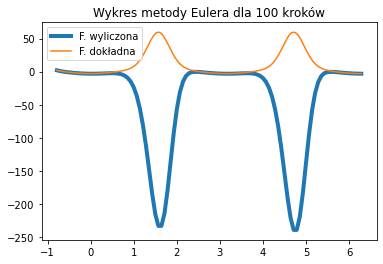

In [11]:
draw_euler(100)

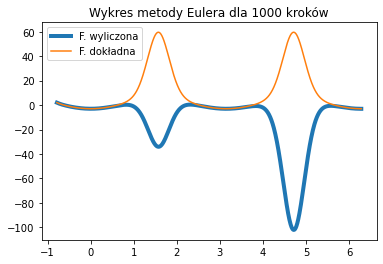

In [212]:
draw_euler(1000)

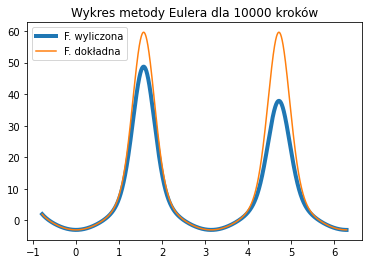

In [213]:
draw_euler(10000)

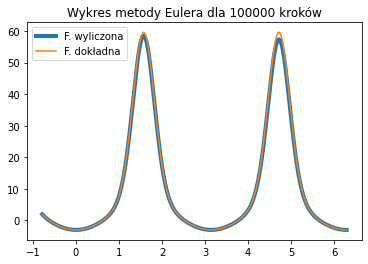

In [214]:
draw_euler(100000)

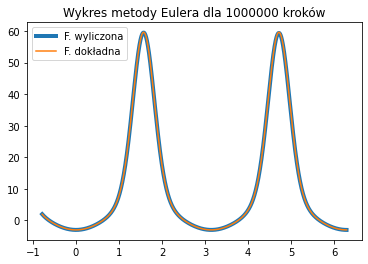

In [215]:
draw_euler(1000000)

In [216]:
def runge_kutta(x0, a, xk, f, n, degree=4):
    h = (xk-x0)/(n-1)
    x = np.linspace(x0, xk, n)
    y = np.empty(x.shape)
    y[0] = a
    
    def F(x, y):
        k1 = h*f(x, y)
        if degree == 1: return k1
        
        k2 = h*f(x+.5*h, y+.5*k1)
        if degree == 2: return k2
        
        k3 = h*f(x+.5*h, y+.5*k2)
        
        k4 = h*f(x+h, y + k3)
        if degree == 4: return (k1 +2*k2 + 2*k3 + k4)/6
        
        
    
    for i in range(1, n):        
        y[i] = y[i-1] + F(x[i-1], y[i-1])
    
    return x, y
    

In [217]:
def draw_runge_kutta(n, degree):
    X = np.linspace(x0, xk, 1000)
    Y = np.vectorize(exact_f)(X)

    nx, ny = runge_kutta(x0, exact_f(x0), xk, f, n, degree)
    plt.title(f'Wykres metody Rungego-Kutty dla {n} kroków')
    plt.plot(X, Y, label='F. dokładna', lw=4)
    plt.plot(nx, ny, label='F. wyliczona')
    plt.legend(loc='upper left')

## Metoda Rungego-Kutty

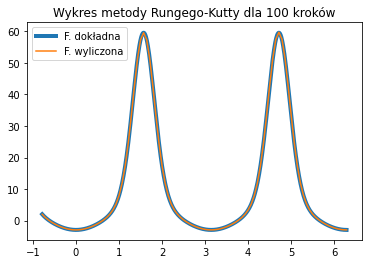

In [218]:
draw_runge_kutta(100, 4)

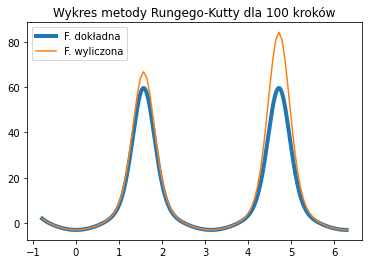

In [219]:
draw_runge_kutta(100, 2)

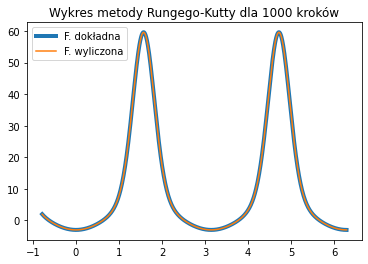

In [220]:
draw_runge_kutta(1000, 2)

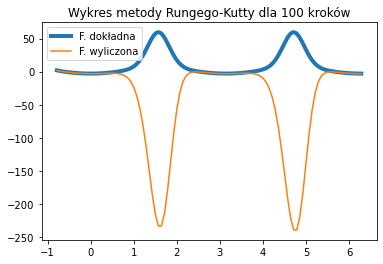

In [221]:
draw_runge_kutta(100, 1)